<a href="https://colab.research.google.com/github/Cintia0528/Data-Cleaning-and-Analysis-with-Python/blob/Colab-Files/4_2_Further_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# orders_qu.csv
url = "https://drive.google.com/file/d/18X5s0QKY4ylp_AsnhB1HH_4H5TSC1Bwd/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders = pd.read_csv(path)

# orderlines_qu.csv
url = "https://drive.google.com/file/d/1Yfy0EwGO_v9VCLBCK_qJWgaAYwsiuC5v/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1L269vIiXZZM3Ax3PrZeSAHCgtHlO2_Pe/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

#final merged table with product categories
url = "https://drive.google.com/file/d/1SoLHTCCY1S6q1W7Vu9QqUZloRzNvRmSl/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
merged = pd.read_csv(path)

In [3]:
merged["disount_percentage"] = merged["discount_percentage"].round(2)

# Base price vs. selling price

## Adjust to missing orderline values

In [4]:
olp = orderlines.merge(products, how='left',on="sku")

In [5]:
olp = olp.drop("product_id",axis=1)

In [6]:
# we need a database with all the unique items sold
product_offerings = olp.groupby('sku')["price"].mean()

In [7]:
product_offerings_df = product_offerings.reset_index()

In [8]:
# remove everything above 1000
product_offerings_df = product_offerings_df.loc[product_offerings_df['price'] < 1000]

In [9]:
product_offerings_df.describe()

,price
count,4991.000000
mean,172.263492
std,221.095936
min,2.990000
25%,35.000000
50%,69.990000
75%,199.990000
max,999.990000


## Product offerings categories

In [10]:
product_offerings_df

,sku,price
0,8MO0001-A,35.00
1,8MO0003-A,35.00
2,8MO0007,35.00
3,8MO0008,35.00
4,8MO0009,35.00
...,...,...
5093,ZAG0040,39.99
5094,ZAG0041,29.99
5095,ZAG0042,29.99
5096,ZEP0007,149.99


In [11]:
product_offerings_df["price_category"] = ""

In [12]:
product_offerings_df.loc[product_offerings_df["price"] < 35, "price_category"] = "cheap"

product_offerings_df.loc[(product_offerings_df["price"] >= 35) & (product_offerings_df["price"] < 199), "price_category"] = "most products"

product_offerings_df.loc[(product_offerings_df["price"] >= 199) & (product_offerings_df["price"] < 475), "price_category"] = "expensive"

product_offerings_df.loc[product_offerings_df["price"] >= 475, "price_category"] = "premium"

In [13]:
products_order = ["cheap", "most products", "expensive", "premium"]

In [14]:
categories_product_price = product_offerings_df["price_category"].value_counts().loc[products_order] #.plot.bar(color = ["lightcoral","navajowhite","mediumaquamarine","orchid"]);

In [15]:
categories_product_price_df = pd.DataFrame(categories_product_price)

In [16]:
categories_product_price_df.reset_index(inplace=True)

## Unit prices categories

In [17]:
olp["unit_pricecat"] = ""

In [18]:
olp.loc[olp["unit_price"] < 35, "unit_pricecat"] = "cheap"

olp.loc[(olp["unit_price"] >= 35) & (olp["unit_price"] < 199), "unit_pricecat"] = "most products"

olp.loc[(olp["unit_price"] >= 199) & (olp["unit_price"] < 475), "unit_pricecat"] = "expensive"

olp.loc[olp["unit_price"] >= 475, "unit_pricecat"] = "premium"

In [19]:
categories_unit_price = olp.groupby("unit_pricecat")["product_quantity"].sum().loc[products_order] #.plot.bar(color = ["lightcoral","navajowhite","mediumaquamarine","orchid"]);

In [20]:
categories_unit_price_df = pd.DataFrame(categories_unit_price)

In [21]:
categories_unit_price_df.reset_index(inplace=True)

## Without the same axes it is hard to compare

## Create Pie Chart with Seaborn

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

### Unit prices

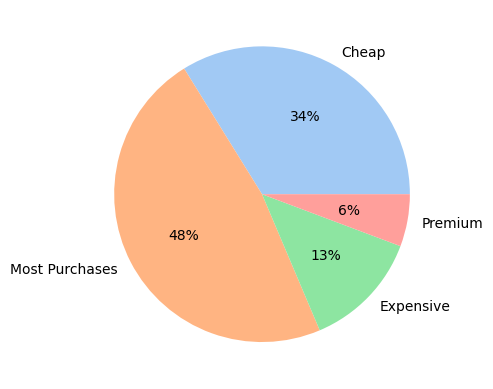

In [23]:
#define data
data = [20302, 28538, 7741, 3430]
labels = ['Cheap', 'Most Purchases', 'Expensive', 'Premium']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

###  Base Prices

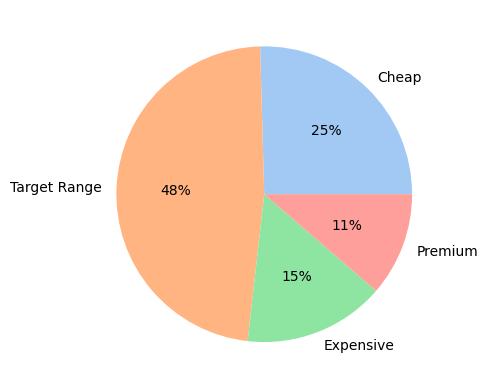

In [24]:
#define data
data = [1247, 2341, 757, 556]
labels = ['Cheap', 'Target Range', 'Expensive', 'Premium']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()



## Visualize with Seaborn

### Unit Price

In [25]:
categories_unit_price_df

,unit_pricecat,product_quantity
0,cheap,20302
1,most products,28538
2,expensive,7741
3,premium,3430


In [26]:
categories_unit_price_df["percentage"] = categories_unit_price_df['product_quantity']/60011*100
categories_unit_price_df["percentage"]= categories_unit_price_df["percentage"].round(2)

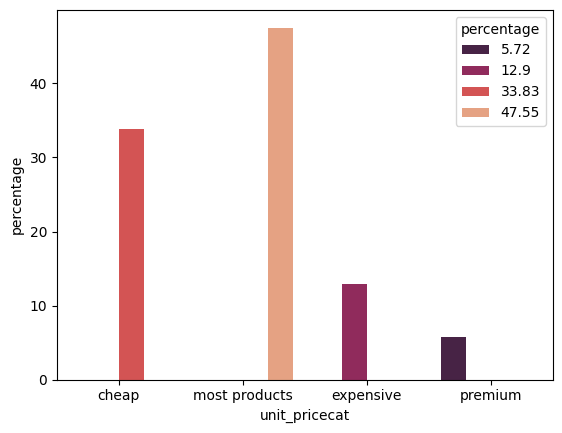

In [27]:
sns.barplot(data=categories_unit_price_df,
            x="unit_pricecat",
            y="percentage",
            hue="percentage",
             palette="rocket");

### Base Price

In [28]:
categories_product_price_df

,index,price_category
0,cheap,1247
1,most products,2431
2,expensive,757
3,premium,556


In [29]:
categories_product_price_df = categories_product_price_df.rename({"price_category":"product_count"})

In [30]:
categories_product_price_df["percentage"] = categories_product_price_df['price_category']/4991*100
categories_product_price_df["percentage"]= categories_product_price_df["percentage"].round(2)

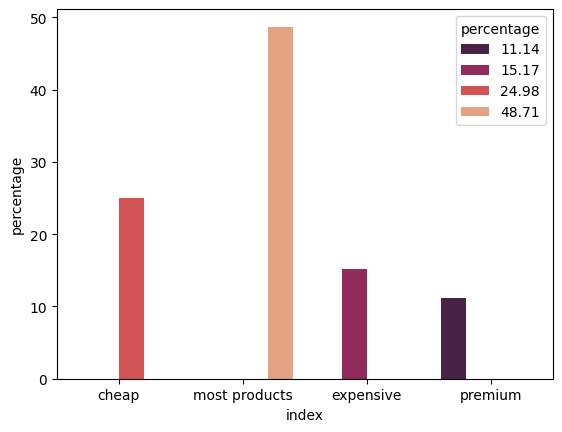

In [31]:
sns.barplot(data=categories_product_price_df,
            x="index",
            y="percentage",
            hue="percentage",
             palette="rocket");

# Average product vs. average sales price

In [36]:
pd.set_option('display.max_columns', None)

In [38]:
merged_copy = merged.loc[merged["base_price"]<1000]

In [47]:
products_copy = products.loc[products["price"]<1000]

In [50]:
merged.head(1)

,orderlines_id,id_order,product_quantity,sku,unit_price,date,total_paid,state,name,desc,base_price,in_stock,type,discounts,discount_percentage,year,month,product_times_quantity,price_category,product_type,disount_percentage
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.5,22.134776,2017,1,47.49,most products,memory_expansion,22.13


In [57]:
product_count = merged_copy.groupby(['product_type', 'id_order'])['sku'].nunique().reset_index()

# Sum up the counts for each category
category_total_counts = (product_count.groupby('product_type')['sku'].sum().reset_index().rename(columns={'sku': 'unique_product_count'}))

# Category Counts
Are discounts used in a meaningful way where more valuable categories are present in more sales?

In [74]:
merged_copy.head(1)

,orderlines_id,id_order,product_quantity,sku,unit_price,date,total_paid,state,name,desc,base_price,in_stock,type,discounts,discount_percentage,year,month,product_times_quantity,price_category,product_type,disount_percentage
0,1119116,299545,1,OWC0100,47.49,2017-01-01 01:46:16,51.48,Completed,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.5,22.134776,2017,1,47.49,most products,memory_expansion,22.13


In [77]:
value_by_product_categories = merged_copy.groupby("product_type")["product_times_quantity"].sum().sort_values(ascending = False)

In [80]:
value_by_product_categories_df = pd.DataFrame(value_by_product_categories)

In [81]:
value_by_product_categories_df.reset_index(inplace = True)

In [83]:
value_by_product_categories_df

,product_type,product_times_quantity
0,memory_expansion,2674478.57
1,apple_electronics,1749696.57
2,all_accessories,1189414.41
3,video_audio_graphic_design,679444.56
4,batteries_ports_cables_adapters,657157.01
5,smart_gadgets,502291.63
6,home_repair,48624.24
7,apps_licenses_services,3504.24


<Axes: >

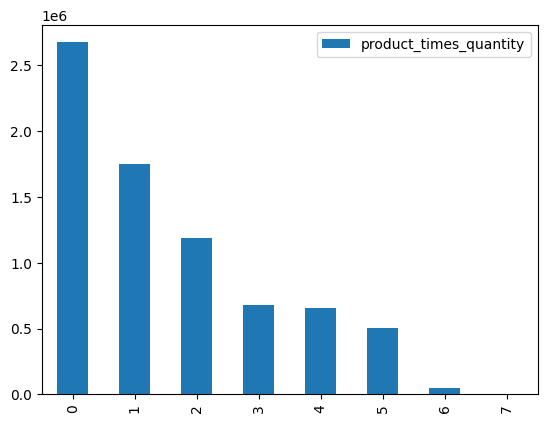

In [82]:
value_by_product_categories_df.plot.bar()

In [66]:
category_total_counts

,product_type,unique_product_count
0,all_accessories,13487
1,apple_electronics,3048
2,apps_licenses_services,29
3,batteries_ports_cables_adapters,10568
4,home_repair,1868
5,memory_expansion,14875
6,smart_gadgets,3749
7,video_audio_graphic_design,5157


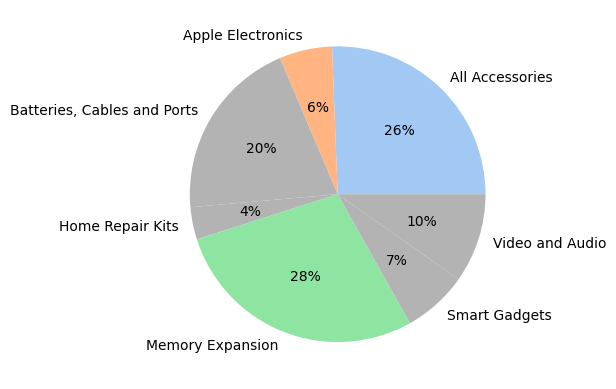

In [84]:
#define data
data = [13516, 3048, 10568, 1868, 14875, 3749, 5157]
labels = ['All Accessories', 'Apple Electronics', 'Batteries, Cables and Ports','Home Repair Kits','Memory Expansion','Smart Gadgets','Video and Audio']

# Define Seaborn color palette to use
pastel_palette = sns.color_palette('pastel')
gray_color = (0.7, 0.7, 0.7)  # RGB values for gray color

# Define a list of colors corresponding to each label
colors = [
    pastel_palette[0],  # All Accessories
    pastel_palette[1],  # Apple Electronics
    gray_color,         # Batteries, Cables and Ports
    gray_color,         # Home Repair Kits
    pastel_palette[2],  # Memory Expansion
    gray_color,         # Smart Gadgets
    gray_color          # Video and Audio
]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [62]:
sales_total_counts = merged_copy.groupby("product_type")["product_quantity"].sum()

In [63]:
sales_total_counts_df = pd.DataFrame(sales_total_counts)
sales_total_counts_df.reset_index(inplace = True)

In [64]:
sales_total_counts_df

,product_type,product_quantity
0,all_accessories,14484
1,apple_electronics,3146
2,apps_licenses_services,32
3,batteries_ports_cables_adapters,11984
4,home_repair,1961
5,memory_expansion,17847
6,smart_gadgets,4341
7,video_audio_graphic_design,5760


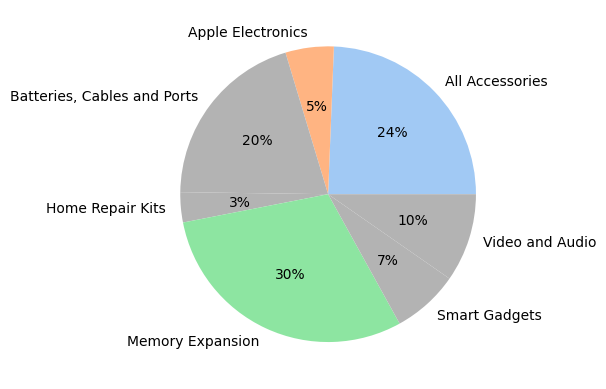

In [85]:
#define data
data = [14516, 3146, 11984, 1961, 17847, 4341, 5760]
labels = ['All Accessories', 'Apple Electronics', 'Batteries, Cables and Ports','Home Repair Kits','Memory Expansion','Smart Gadgets','Video and Audio']

# Define Seaborn color palette to use
pastel_palette = sns.color_palette('pastel')
gray_color = (0.7, 0.7, 0.7)  # RGB values for gray color

# Define a list of colors corresponding to each label
colors = [
    pastel_palette[0],  # All Accessories
    pastel_palette[1],  # Apple Electronics
    gray_color,         # Batteries, Cables and Ports
    gray_color,         # Home Repair Kits
    pastel_palette[2],  # Memory Expansion
    gray_color,         # Smart Gadgets
    gray_color          # Video and Audio
]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Average price

How do discounts effect the company's positioning?


## Actual data we have  - no purchases over 999.99

In [89]:
products_copy["price"].mean().round(2)
# 185.67

185.67

In [91]:
merged_copy["product_times_quantity"].mean().round(2)

142.12

In [92]:
142.12/185.67*100

76.54440674314645

## Reflected to the original product catalog


In [96]:
product_mean = products["price"].mean().round(2)
# average product value = 667.35

In [99]:
anticipated_sales_mean = product_mean * 0.76544
# 510.82

In [101]:
anticipated_sales_mean.round(2)

510.82

# Deepdive on Black Friday and Cyber Monday


*   Black Friday sales account for 20% of all sales
*   Black Friday sales account for 24.2% of all revenue



## Limit sales data to 2017

In [104]:
november_sales = merged_copy.loc[merged_copy["month"] == 11]

In [117]:
sales_17 = merged_copy.loc[merged_copy["year"] == 2017]

## Percentage of all sales realized in November

In [ ]:
#8348 orderlines
november_sales.info()

In [ ]:
#41720 orderlines
sales_17.info()

In [119]:
# November sales account for 20% of all sales
8348/41720*100

20.009587727708535

## Percentage of all revenue realized in November

In [115]:
november_sales["product_times_quantity"].sum()
#1446106.29

1446106.29

In [120]:
sales_17["product_times_quantity"].sum()
#5982143.49

5982143.49

In [ ]:
#November sales account for 24.2% of all revenue

In [121]:
1446106.29/5982143.49*100

24.17371452920465

## 2017.03

*   High discounts
*   Low sales



In [123]:
march_17 = merged_copy.loc[(merged_copy["year"] == 2017) & (merged_copy["month"] == 3)]
# 220 sales - 0.5% sales
# 25508.97 - 0.4% revenue

In [127]:
 25508.97/5982143.49*100

0.42641855787380983